

# Project: Investigate a Dataset - Medical Appointment No Shows

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row. The dataset contains 14 columns: ‘ScheduledDay’ tells us on what day the patient set up their appointment.
‘Neighborhood’ indicates the location of the hospital.
‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
'No show ' indicates weather a patient showed up for an appointment or not.‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.


### Question(s) for Analysis
1. What is the overall showup versus no showup rate?
2. Which of the following factors (age,neighbourhood,scholarship,gender,having recieved an sms) determine if a person will show up to their appointment?


 

In [1]:
#importing necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling


In [2]:
# Load your data and print out a few lines.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#   What is the size of your dataframe? 
df.size


1547378

In [4]:
df.shape

(110527, 14)

In [5]:
#operations to inspect data types and look for instances of missing or possibly errant data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
# Checking duplicated data
sum(df.duplicated())

0

In [7]:
#check if there is an age with minus or 0 value
df[df["Age"] <= 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
59,7.184428e+13,5638545,F,2016-04-29T08:08:43Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
63,2.366233e+14,5628286,M,2016-04-27T10:46:12Z,2016-04-29T00:00:00Z,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,1.885174e+14,5616082,M,2016-04-25T13:28:21Z,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,2.718818e+14,5628321,M,2016-04-27T10:48:50Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
67,8.647128e+13,5639264,F,2016-04-29T08:53:02Z,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110345,1.473952e+14,5702537,F,2016-05-16T12:30:58Z,2016-06-01T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110346,5.577525e+12,5777724,M,2016-06-06T14:22:34Z,2016-06-08T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110454,6.142460e+11,5772400,F,2016-06-03T15:18:44Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110460,4.321846e+13,5769545,F,2016-06-03T08:56:51Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No



### Data Cleaning
In the preceding cells we have loaded the dataset using *df.head()* to inspect the first few rows to get a sense of structure and content. We found the size and shape of the data set *df.size* & *df.shape* to the number of elements find the number of rows and columns respectively. Using *df.info()* we found the summary of the data frame,we investigated if we had any duplicated values and found none.
Finally we found that there were ages indicating zero values

In the next cells we shall be working on:
- Renaming columns with spelling errors and special characters for uniformity Hipertension, Handcap and No-show.
- Changing ScheduledDay and AppointmentDay Columns from object datatype to datetime.
- Fixing ages that indicate zero.


In [8]:
#Renaming columns
df.rename(columns ={'Hipertension':'Hypertension','Handcap':'Handicap','No-show':'No_show'},inplace=True)
df.head(0)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show


In [9]:
# Changing ScheduledDay to datetime datatype
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])
df['ScheduledDay'].dtype

datetime64[ns, UTC]

In [10]:
# Changing AppointmentDay to datetime datatype
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])
df['AppointmentDay'].dtype

datetime64[ns, UTC]

In [11]:
#Fixing the showing zero
meanAge = df['Age'][df['Age']>0].mean().astype(int)
df.loc[df['Age'] <= 0,'Age'] = meanAge
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hypertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handicap        110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No_show       

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: What is the overall showup versus no showup rate?

In [12]:
# Distribution of patients that showed up and those that did not
df['No_show'].value_counts()

No_show
No     88208
Yes    22319
Name: count, dtype: int64

88207 patients showed up for their appointment and 22319 patients did not show up

In [13]:
# Function to plot bar chart
def plot_bar(data, x_label, y_label, title, figsize=(5, 5)):
    ax = data.plot(kind='bar', title=title, figsize=figsize, rot=0)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    plt.show()

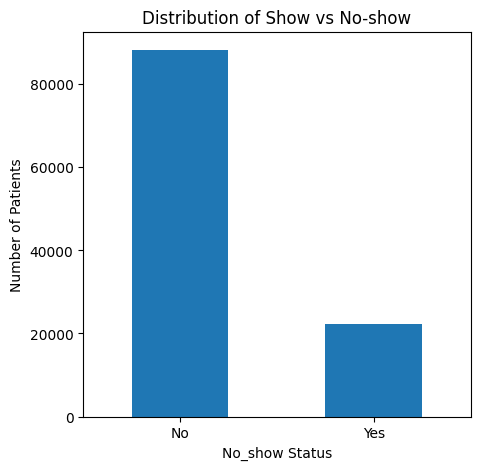

In [14]:
#Plotting distribution of show versus no show patients
plot_bar(df['No_show'].value_counts(), 'No_show Status', 'Number of Patients', 'Distribution of Show vs No-show')

### Research Question 2:Which of the following factors (age,scholarship,gender,having recieved an sms) determine if a person will show up to their appointment?

#### Gender

In [15]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [16]:
#checking distribution of gender in the patients
df['Gender'].value_counts()

Gender
F    71840
M    38687
Name: count, dtype: int64

There are 71840 females and 38687 males

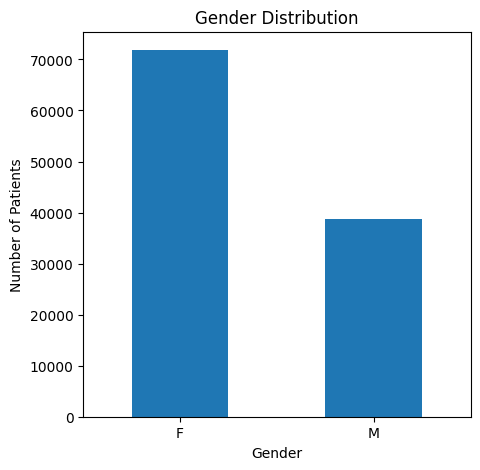

In [17]:
#plotting distribution of Gender on a bar
# Gender distribution (Bar plot)
plot_bar(df['Gender'].value_counts(), 'Gender', 'Number of Patients', 'Gender Distribution')

There are more female patients than male patients

In [18]:
# Function to calculate percentage
def calculate_percentage(part, whole):
    return (part / whole) * 100

In [19]:
#assigning the number of patients to a variable
patients_count = df['Gender'].count()
patients_count

110527

In [22]:
# assigning number of female patients to a variable
Female_count = df.query('Gender =="F"').count().Gender
#calculating percentage of female patients 
calculate_percentage(Female_count,patients_count)

64.99769287142509

In [23]:
# assigning number of male patients to a variable
male_count = df.query('Gender =="M"').count().Gender
#calculating percentage of female patients 
calculate_percentage(male_count,patients_count)

35.00230712857492

In [24]:
#showing the relation between showing up and gender
gender_no_show_counts=df.groupby(['Gender', 'No_show'],as_index=False).size()
# Pivot the DataFrame
gender_no_show_pivot = gender_no_show_counts.pivot(index='Gender', columns='No_show', values='size').fillna(0)
gender_no_show_pivot

No_show,No,Yes
Gender,,
F,57246,14594
M,30962,7725


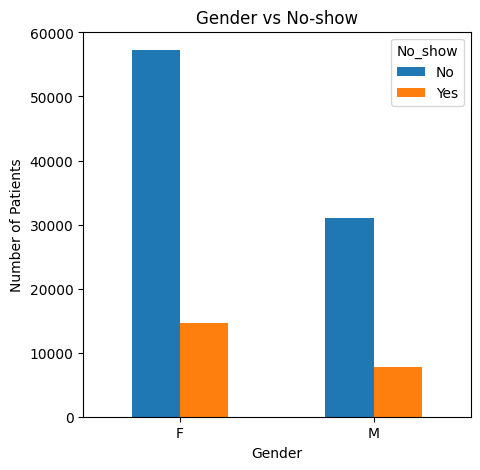

In [25]:
#Plotting the distribution
# Using plot_bar function to visualize the relationship between gender and no-show
plot_bar(gender_no_show_pivot, 'Gender', 'Number of Patients', 'Gender vs No-show')

In [51]:
# Function to calculate probability
def probability(successes, total):
    return round(successes / total,2)

In [52]:
#probability of women attending her appointment# Filtering females who showed up
females_showed_up = df.query('Gender == "F" and No_show == "No"').shape[0]

female_prob = probability(females_showed_up,Female_count)
female_prob

0.8

The probability of women showing up to their appointments is 0.8

In [54]:
#probability of men attending her appointment# Filtering females who showed up
males_showed_up = df.query('Gender == "M" and No_show == "No"').shape[0]

male_prob = probability(males_showed_up,Female_count)
male_prob

0.43

The probability of men showing up to their appointments is 0.43

#### Scholarship

In [33]:
df['Scholarship'].value_counts()

Scholarship
0    99666
1    10861
Name: count, dtype: int64

Of the patients 99666 are on scholarship while 10861 are not on scholarship

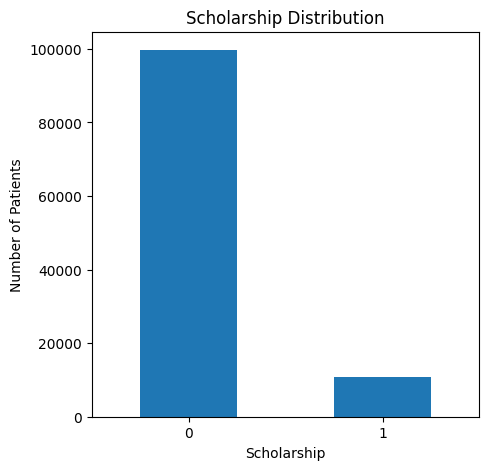

In [29]:
#distribution of patients based on Scholarship
plot_bar(df['Scholarship'].value_counts(),'Scholarship','Number of Patients','Scholarship Distribution')

In [30]:
#showing the relation between showing up and having a scholarship
scholarship_no_show_counts=df.groupby(['Scholarship', 'No_show'],as_index=False).size()
#creating a pivot table for Scholarship and NoShow
scholarship_no_show_counts = scholarship_no_show_counts.pivot(index='Scholarship', columns='No_show', values='size').fillna(0)
scholarship_no_show_counts

No_show,No,Yes
Scholarship,,
0,79925,19741
1,8283,2578


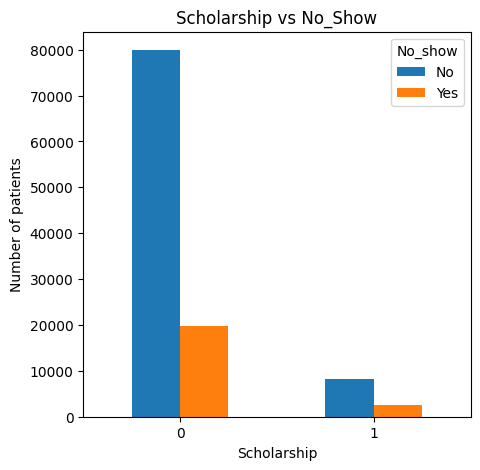

In [31]:
plot_bar(scholarship_no_show_counts,'Scholarship','Number of patients','Scholarship vs No_Show' )

The graph shows that for each scholarship status, majority of the patients showed up.

In [60]:
# Count of patients with a scholarship and those with out
scholarship_count = df.query('Scholarship == 1').count().Scholarship
no_scholarship_count = df.query('Scholarship == 0').count().Scholarship
print(scholarship_count)
print(no_scholarship_count)

10861
99666


10861 patients are on scholarship, 99666 are not on scholarship

In [61]:
# Probability of scholarship patient showing up
scholarship_show_up=df.query('Scholarship == 1 and No_show == "No"').shape[0]
scholarship_prob = probability(scholarship_show_up,scholarship_count)
scholarship_prob

0.76

The probability of a patient on scholarship showing up is 0.7

In [62]:
# Probability of no scholarship patient showing up
no_scholarship_show_up=df.query('Scholarship == 0 and No_show == "No"').shape[0]
no_scholarship_prob = probability(no_scholarship_show_up,no_scholarship_count)
no_scholarship_prob

0.8

The probability of a patient not on scholarship showing up is 0.8

#### SMS_recieved

In [43]:
df['SMS_received'].value_counts()

SMS_received
0    75045
1    35482
Name: count, dtype: int64

75044 patients  did not receive SMS
35482 patients  received SMS

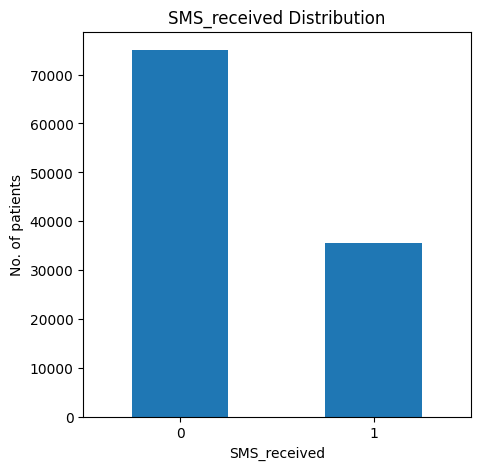

In [32]:
#distribution of patients based on SMS_recieved
plot_bar(df['SMS_received'].value_counts(),'SMS_received','No. of patients','SMS_received Distribution')

In [33]:
# Group by SMS_received and No_show, and count occurrences
SMS_no_show_counts = df.groupby(['SMS_received', 'No_show'], as_index=False).size()
# Pivot the DataFrame
SMS_no_show_pivot = SMS_no_show_counts.pivot(index='SMS_received', columns='No_show', values='size').fillna(0)
SMS_no_show_pivot

No_show,No,Yes
SMS_received,,
0,62510,12535
1,25698,9784


62509 did not receive SMS and showed up
25698 patients  received SMS and showed up

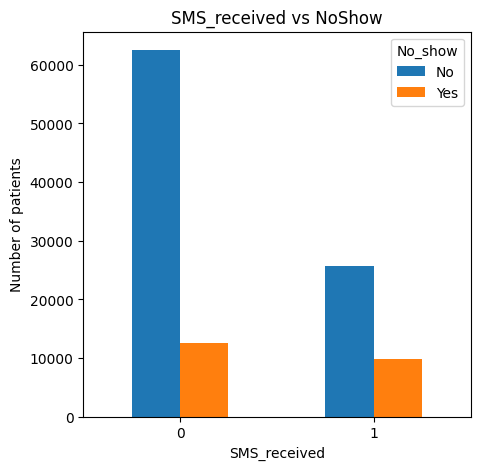

In [35]:
plot_bar(SMS_no_show_pivot,'SMS_received','Number of patients','SMS_received vs NoShow')

In [67]:
#Number of patients who recieved an SMS
SMS_recieved_count = df.query('SMS_received == 1').shape[0]
SMS_recieved_count

35482

In [69]:
#Number of patients who did not recieved an SMS
no_SMS_recieved_count = df.query('SMS_received == 0').shape[0]
no_SMS_recieved_count

75045

In [64]:
#Number of patients who recieved an SMS and showed up
SMS_recieved_show = df.query('SMS_received == 1 and No_show == "No"').count().SMS_received
no_SMS_recieved_show = df.query('SMS_received == 0 and No_show == "No"').count().SMS_received
print(SMS_recieved_show)
print(no_SMS_recieved_show)

25698
62510


25698 recieved SMS and showed up while 62510 patients did not receive SMS and showed up.

In [68]:
#probability of patient who recieved SMS showing up
sms_show_prob = probability(SMS_recieved_show,SMS_recieved_count)
sms_show_prob

0.72

The probability of patient who recieved SMS showing up is 0.72

In [70]:
#probability of patient who did not recieved SMS showing up
no_sms_show_prob = probability(no_SMS_recieved_show,no_SMS_recieved_count)
no_sms_show_prob

0.83

The probability of patient who did not recieve an SMS showing up is 0.83
The probability of a patient who did not recieve an SMS showing up is higher than that of one who recieved

#### Age

In [71]:
#Average age of people who showed up
average_age_showed = df.loc[df['No_show'] == 'No', 'Age'].mean()
average_age_showed


39.039826319608196

In [72]:
#Average age of people who did  not showed up
average_age_showed = df.loc[df['No_show'] == 'Yes', 'Age'].mean()
average_age_showed

35.405618531296206

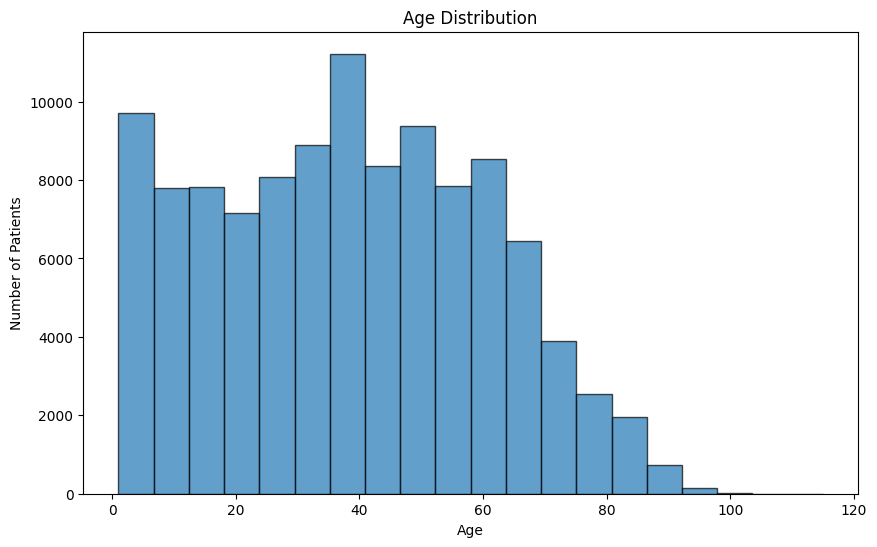

In [73]:
# Plot the distribution of ages
plt.figure(figsize=(10, 6))
df['Age'].plot(kind='hist', bins=20, edgecolor='black', alpha=0.7)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.show()

In [74]:
# Define bins and labels for age categories
bins = [0, 12, 19, 60, 120]  # Defining age ranges: Children (0-12), Teenagers (13-19), Adults (20-60), Elderly (60+)
labels = ['Children', 'Teenagers', 'Adults', 'Elderly']
# Create a new column 'Age_category' with the corresponding labels
df['Age_category'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
df[['Age', 'Age_category']].head()

,Age,Age_category
0,62,Elderly
1,56,Adults
2,62,Elderly
3,8,Children
4,56,Adults


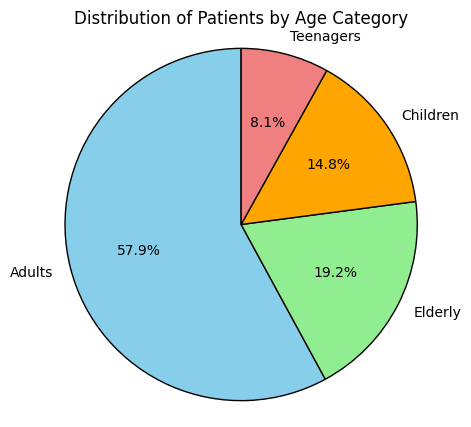

In [75]:
#The distribution of patients according to  age categories 
# Getting value counts for Age_category
age_category_counts = df['Age_category'].value_counts()
# Plotting the pie chart
plt.figure(figsize=(5, 5))
plt.pie(age_category_counts, labels=age_category_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'orange', 'lightcoral'], startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Patients by Age Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


Adults are more likely to show up as compared to Teenagers

In [76]:
#Showing the relationship between age categories and showing up
# Group by Age Category and No_show, and count occurrences (with observed=False to retain current behavior)
ac_no_show_counts = df.groupby(['Age_category', 'No_show'], as_index=False, observed=False).size()
# Pivot the DataFrame
ac_no_show_pivot = ac_no_show_counts.pivot(index='Age_category', columns='No_show', values='size').fillna(0)
# Show the pivot table
ac_no_show_pivot

No_show,No,Yes
Age_category,,
Children,13009,3396
Teenagers,6610,2312
Adults,50658,13369
Elderly,17931,3242


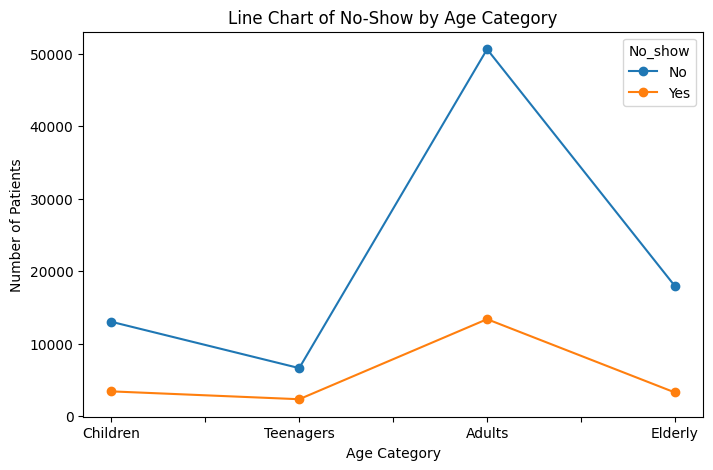

In [77]:
# Line chart for Show/No-Show by Age Category
ac_no_show_pivot.plot(kind='line', marker='o', figsize=(8, 5))

# Customize the plot
plt.title('Line Chart of No-Show by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)
plt.legend(title='No_show')
plt.show()

- The lines made it easy to track the variations in attendance across the age groups. A rising line indicated an increase in the number of patients,while a descending line indicated a decrease.
- According to the "No" line on the  chart Adults attended their appointments more than any other age categories.
- The "Yes" line on the Noshow line chart highlighted the age groups more prone to missing appointments.

<a id='conclusions'></a>
## Conclusions
Several independent variables were analyzed to predict whether a patient would show up for their appointment:
 - Gender
 - Scholarship
 - SMS_recieved
 - Age

Gender: Gender does not significantly influence whether a person will attend their appointment. Although the probability of women showing up is higher than that of men 0.8 and 0.43 respectively.

SMS_recieved: Sending an SMS reminder does not necessarily guarantee that a patient will attend their appointment. It may not be the most effective strategy for ensuring attendance. 

Scholarship Impact: Patients with a scholarship have a higher likelihood of missing their appointments compared to those without a scholarship.

Age as a Key Factor: Age is identified as a significant factor in predicting appointment attendance. 


## Limitations
- This study focuses on analyzing these variables in isolation. As such, conclusions are based on their individual influence on the dependent variable(showing up), rather than on any potential combined effects. Gender is such a variable that combined with other variables
- The analysis lacks potentially significant features, such as employment status or the presence of serious medical issues, which could provide deeper insights into the factors influencing not showing up for appointments
- Some data points are illogical, such as patients with an age of 0 or less, which may affect the accuracy of the analysis.
- Variables such as Alcoholism,Handicap,Neighbourhood were not analyzed in-depth in this study.
